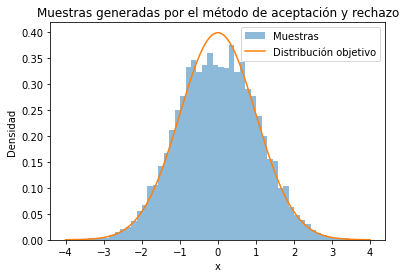

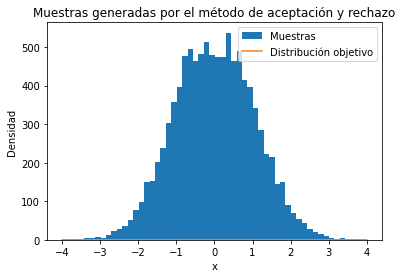

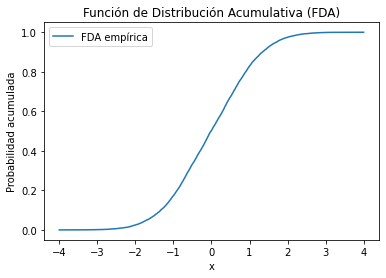

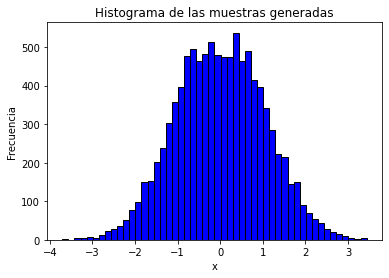

In [1]:
#Método de Aceptación y Rechazo.
"""
La función objetivo representa la densidad de probabilidad de una distribución normal
estándar, con media 0 y desviación estándar 1. Y calcula el valor de la función de
densidad de probabilidad en un punto x. La función envolvente representa
una distribución uniforme simple. Nos devuelve la constante, en éste caso,
de 1/8, porque es el valor máximo de la función envolvente en el intervalo
[-4,4]. M es un factor escalado utilizado en éste método. Es el valor
máximo de la relación entre la distribución objetivo y la distribución envolvente.
La función de muestreo genera muestras, a una lista, muentras las muestras sean
menores que el tamaño que estamos especificando generaremos candidatos a través de
una uniforme en el intervalo [-4,4], generamos valores para y, entre 0 y M multiplicada
por la distribución envolvente. Si y es menor o igual a la distribución objetivo de
la equis generada como candidato, se acepta el candidato como una muestra. Y graficamos. 
"""
import numpy as np
import matplotlib.pyplot as plt
def distribucion_objetivo(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-0.5*x**2)
def distribucion_envolvente(x):
    return 1/8
M = np.sqrt(2*np.pi)
def muestreo_aceptacion_rechazo(dist_objetivo,dist_envolvente,M,tamano_muestra):
    muestras=[]
    while len(muestras)<tamano_muestra:
        x_candidato=np.random.uniform(-4,4)
        y=np.random.uniform(0,M*dist_envolvente(x_candidato))
        if y<=dist_objetivo(x_candidato):
            muestras.append(x_candidato)
    return np.array(muestras)
tamano_muestra=10000
muestras=muestreo_aceptacion_rechazo(distribucion_objetivo,distribucion_envolvente,M,tamano_muestra)
x=np.linspace(-4,4,1000)
plt.hist(muestras,bins=50,density=True,alpha=0.5,label='Muestras')
plt.plot(x,distribucion_objetivo(x),label='Distribución objetivo')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.title('Muestras generadas por el método de aceptación y rechazo')
plt.show()
x=np.linspace(-4,4,1000)
#print(type(muestras))
muestras1=[]
for i in range(len(muestras)):
    muestras1.append(muestras[i])
plt.hist(muestras1,bins=50,label='Muestras')
plt.plot(x,distribucion_objetivo(x),label='Distribución objetivo')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.title('Muestras generadas por el método de aceptación y rechazo')
plt.show()
def distribucion_acumulativa_empirica(muestras,x):
    return np.array([np.sum(muestras <= xi) / len(muestras) for xi in x])
x=np.linspace(-4,4,1000)
fda_empirica=distribucion_acumulativa_empirica(muestras,x)
plt.plot(x, fda_empirica, label='FDA empírica')
plt.xlabel('x')
plt.ylabel('Probabilidad acumulada')
plt.legend()
plt.title('Función de Distribución Acumulativa (FDA)')
plt.show()
muestras2=[]
for i in range(len(muestras)):
    muestras2.append(muestras[i])
plt.hist(muestras2, bins=50,color='blue', edgecolor='black')
plt.xlabel('x')
plt.ylabel('Frecuencia')
plt.title('Histograma de las muestras generadas')
plt.show()